In this note, we will use the python package **Qiskit** to demonstrate how to build quantum circuits and manipulate quantum bits. One can read more detail tutorials on the Qiskit website at this [link](https://qiskit.org/documentation/tutorials.html).

In [1]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.tools.visualization import circuit_drawer
from qiskit import BasicAer
from qiskit.visualization import plot_histogram, plot_bloch_multivector

# Single Qubit Quantum states

A single qubit quantum state can be written as

$$ \vert \psi \rangle = \alpha \vert 0 \rangle + \beta \vert 1 \rangle, $$

where $\alpha$ and $\beta$ are complex numbers. A convenient representation is

$$ \vert \psi \rangle = \cos(\theta/2) \vert 0 \rangle + \sin(\theta/2) e^{i\phi} \vert 1 \rangle, $$

where $ 0 \le \phi < 2\pi$ and $0 \le \theta \le \pi$. This is called the Bloch sphere representation of a qubit state.

# Single-Qubit Gates

Quantum gates/operations are usually represented as matrices. A gate which acts on a qubit is represented by a 2×2 unitary matrix $U$. The action of the quantum gate is found by multiplying the matrix representing the gate with the vector which represents the quantum state.

$$ \vert \psi' \rangle = U \vert  \psi \rangle, $$

The most general form of a single qubit unitary is

$$ U = \begin{pmatrix} \cos(\theta/2) & e^{-i\lambda}\sin(\theta/2) \\ e^{i\phi} \sin(\theta/2) & e^{i\lambda + i\phi} \cos(\theta/2) \end{pmatrix} $$

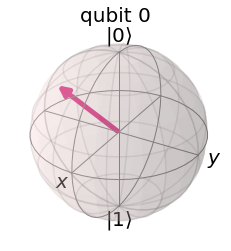

In [89]:
qc = QuantumCircuit(1)
qc.ry(np.pi/4, 0)
qc.rz(-np.pi/4, 0)

# execute the quantum circuit
backend = BasicAer.get_backend('statevector_simulator') # the device to run on
result = backend.run(transpile(qc, backend)).result()
psi  = result.get_statevector(qc)

plot_bloch_multivector(psi)

## Hadamard Gate (H)

This gate rotates a classical state to a superposition quantum state with equal probaility.

$$ U_H = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}$$ 

$$ | 0 \rangle \rightarrow \frac{1}{\sqrt{2}} (| 0 \rangle  + | 1 \rangle) $$
$$ | 1 \rangle \rightarrow \frac{1}{\sqrt{2}} (| 0 \rangle  - | 1 \rangle) $$

In [90]:
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)
qc.draw()

┌───┐┌─┐
q_0: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

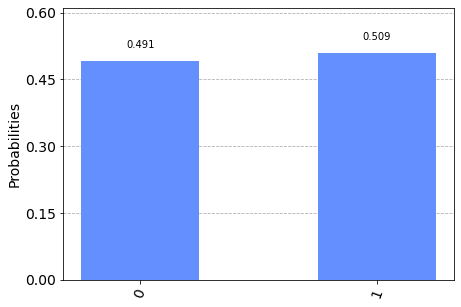

In [91]:
backend = BasicAer.get_backend('qasm_simulator')
job = backend.run(transpile(qc, backend))
counts = job.result().get_counts(qc)
plot_histogram(counts)

# Multi-Qubit Gates

## Controlled-NOT Gate (CNOT)

$$ | 00 \rangle \rightarrow | 00 \rangle, | 01 \rangle \rightarrow | 01 \rangle, | 10 \rangle \rightarrow | 11 \rangle, | 11 \rangle \rightarrow | 11 \rangle $$

In [96]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q, c)

#qc.h(q[0])
qc.x(q[1])

qc.cx(q[0], q[1])
qc.measure(q, c)
qc.draw()

┌─┐   
q437_0: ───────■──┤M├───
        ┌───┐┌─┴─┐└╥┘┌─┐
q437_1: ┤ X ├┤ X ├─╫─┤M├
        └───┘└───┘ ║ └╥┘
 c28: 2/═══════════╩══╩═
                   0  1

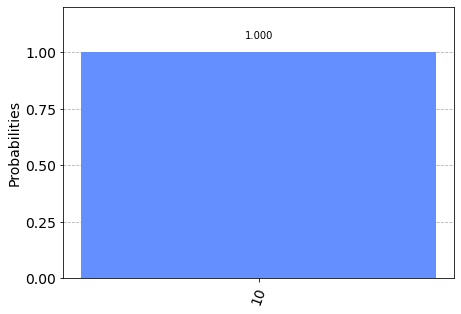

In [97]:
backend = BasicAer.get_backend('qasm_simulator')
job = backend.run(transpile(qc, backend))
counts = job.result().get_counts(qc)
plot_histogram(counts)